## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import math

In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset = 'train')
mydata_test = fetch_20newsgroups(subset = 'test')

In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
# Preprocessing the data

lines = [] 
word_list = [] 

for line in text:
    #tokenize the text documents and update the lists word_list and lines

    line = line.lower()
    line = word_tokenize(line)
    line = [word for word in line if word.isalpha()]
    lines.append(line)
    
    additions = [word for word in line if word not in word_list] #new words, though there may be duplicates IN this list
    for word in additions:
        if word in word_list:
            continue
        else:
            word_list.append(word)
        
# Make sure the word_list contains unique tokens || forced this in construction
# word_list = 

# Calculate the total documents present in the corpus
total_docs = len(text)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
for i in range(len(word_list)):
    dict_idx[word_list[i]] = i


In [8]:
# Create a frequency dictionary

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''

    freq_word = {}

    for line in lines:
        words_seen = []
        for word in line:
            if word in freq_word.keys() and word not in words_seen:
                freq_word[word] += 1
                words_seen.append(word)
                continue
            if word not in words_seen:
                freq_word[word] = 1
                words_seen.append(word)
                continue
    
    #for word in word_list: AHHH, the bad way
    #    freq_word[word] = 0
    #    for line in lines:
    #        if word in line:
    #            freq_word[word] += 1
    return freq_word

In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function
# Expect this chunk to take a comparatively longer time to execute since our dataset is large
print(len(lines))
print(len(word_list))
freq_word = frequency_dict(lines)

freq_word

11314
73243


{'from': 11314,
 'lerxst': 2,
 'where': 1824,
 'my': 4456,
 'thing': 1193,
 'subject': 11314,
 'what': 4473,
 'car': 561,
 'is': 8648,
 'this': 6803,
 'organization': 10867,
 'university': 4427,
 'of': 9885,
 'maryland': 99,
 'college': 517,
 'park': 170,
 'lines': 11277,
 'i': 9379,
 'was': 4665,
 'wondering': 295,
 'if': 5828,
 'anyone': 2099,
 'out': 3529,
 'there': 4508,
 'could': 2473,
 'enlighten': 27,
 'me': 3877,
 'on': 6846,
 'saw': 368,
 'the': 10553,
 'other': 2855,
 'day': 908,
 'it': 8083,
 'a': 9862,
 'sports': 103,
 'looked': 273,
 'to': 9869,
 'be': 6434,
 'late': 242,
 'early': 361,
 'called': 779,
 'bricklin': 4,
 'doors': 69,
 'were': 2363,
 'really': 1590,
 'small': 590,
 'in': 9456,
 'addition': 210,
 'front': 324,
 'bumper': 28,
 'separate': 176,
 'rest': 428,
 'body': 308,
 'all': 4372,
 'know': 3280,
 'can': 4801,
 'tellme': 2,
 'model': 297,
 'name': 741,
 'engine': 187,
 'specs': 106,
 'years': 1294,
 'production': 101,
 'made': 1100,
 'history': 393,
 'or': 5

In [10]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    tf = 0
    for ele in document:
        if ele == word:
            tf += 1
    
    return tf/len(document)

In [11]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    df = freq_word[word]
    idf = math.log(len(lines)/df+1)
    
    return idf

In [12]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus WHY CALL THIS SENTENCE AND NOT CORPUS? a sentence very obviously implies a small string of words...
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    num_words = len(dict_idx)
    num_docs = len(sentence)
    tf_idf_vec = np.zeros((num_words,num_docs)) #zeros array, to copy structure from linked site, 1 row per word, 1 column per mail
    
    for i in range(num_docs):
        words_seen = []
        for word in sentence[i]:
            if word not in words_seen:
                tf = term_frequency(sentence[i], word)
                idf = inverse_df(word)
                tf_idf_vec[dict_idx[word],i] = tf*idf
                words_seen.append(word)
        
    return tf_idf_vec

In [13]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vec = tfidf(lines, dict_idx)


## Multinomial Naive Bayes (10 Points)

In [14]:
#Fit a Multinomial Naive Bayes Model on our dataset
model = MultinomialNB()
model.fit(vec.T, list(mydata_train.target))

MultinomialNB()

In [15]:
#DISCLAIMER: This cell was written before I realized that the cell below asks us to predict based on the TRAINING data,
#not the test data.


# Preprocessing the data for TEST


#lines_test = [] 
#word_list_test = [] 

#for line in test:
    #tokenize the text documents and update the lists word_list and lines

#    line = line.lower()
#    line = word_tokenize(line)
#    line = [word for word in line if word.isalpha()]
#    lines_test.append(line)
    
#    additions = [word for word in line if word not in word_list_test] #new words, though there may be duplicates IN this list
#    for word in additions:
#        if word in word_list_test:
#            continue
#        else:
#            word_list_test.append(word)
        
# Make sure the word_list contains unique tokens || forced this in construction
# word_list = 

# Calculate the total documents present in the corpus
#total_docs = len(test)
 
#Create a dictionary to keep track of index of each word
#dict_idx_test = {}
#for i in range(len(word_list_test)):
#    dict_idx_test[word_list_test[i]] = i
    
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''

    freq_word = {}

    for line in lines:
        words_seen = []
        for word in line:
            if word in freq_word.keys() and word not in words_seen:
                freq_word[word] += 1
                words_seen.append(word)
                continue
            if word not in words_seen:
                freq_word[word] = 1
                words_seen.append(word)
                continue
    
    #for word in word_list: AHHH, the bad way
    #    freq_word[word] = 0
    #    for line in lines:
    #        if word in line:
    #            freq_word[word] += 1
    return freq_word

#freq_word_test = frequency_dict(lines_test)

def inverse_df_test(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    df = freq_word_test[word]
    idf = math.log(len(lines_test)/df+1)
    
    return idf

def tfidf_test(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus WHY CALL THIS SENTENCE AND NOT CORPUS? a sentence very obviously implies a small string of words...
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    num_words = len(dict_idx)
    num_docs = len(sentence)
    tf_idf_vec = np.zeros((num_words,num_docs)) #zeros array, to copy structure from linked site, 1 row per word, 1 column per mail
    
    for i in range(num_docs):
        words_seen = []
        for word in sentence[i]:
            if word not in words_seen:
                tf = term_frequency(sentence[i], word)
                idf = inverse_df_test(word)
                tf_idf_vec[dict_idx[word],i] = tf*idf
                words_seen.append(word)
        
    return tf_idf_vec

#vec_test = tfidf_test(lines_test, dict_idx)

In [16]:
#Perform testing on the train dataset

pred = model.predict(vec.T)

In [17]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(list(mydata_train.target), pred, average = 'macro')
Accuracy = metrics.accuracy_score(list(mydata_train.target), pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.8578538135255973
Accuracy:  0.890931589181545


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [18]:
# install libraries
#pip install wikipedia


In [19]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''
#help(wikipedia)
# selected topics
topics = ['Tennis', 'Basketball', 'Swimming', 'Rock and Roll', 'Jazz', 'Pop', 'Pasta', 'Legumes', 'Bread']

# list of articles to be downloaded
articles = ['Roger Federer', 'Rafael Nadal', 'Andy Roddick', 'Michael Jordan', 'Kareem Abdul-Jabbar', 'Larry Bird', 'Michael Phelps', 'Katie Ledecky', 'Ryan Lochte', 'The Beatles', 'The Rolling Stones', 'The Who', 'Duke Ellington', 'John Coltrane', 'Ahmad Jamal', 'Katie Perry', 'Maroon 5', 'Taylor Swift', 'Rigatoni', 'Spaghetti', 'Rotini', 'Peanuts', 'Chickpeas', 'Black turtle bean', 'Rye bread', 'Sourdough', 'Bagel']
# download and store articles (summaries) in this variable
data = []
for article in articles:
    art = wikipedia.summary(article, auto_suggest = False)
    data.append(art)

print(data)


["Roger Federer (German: [ˈrɔdʒər ˈfeːdərər]; born 8 August 1981) is a Swiss professional tennis player. He was ranked world No. 1 by the Association of Tennis Professionals (ATP) for 310 weeks, including a record 237 consecutive weeks, and has finished as the year-end No. 1 five times. He has won 103 ATP singles titles, the second most of all time after Jimmy Connors, including 20 Grand Slam titles, a record eight men's singles Wimbledon titles, and a record six year-end championships.\nFederer has played in an era where he dominated men's tennis along with Rafael Nadal and Novak Djokovic. Referred to as the Big Three, they are considered by some to be the three greatest tennis players of all time. A Wimbledon junior champion in 1998, Federer won his first major singles title at Wimbledon in 2003 at age 21. In 2004, he won three of the four major singles titles and the ATP Finals, a feat he repeated in 2006 and 2007. From 2005 to 2010, he made 18 out of 19 major singles finals. During

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** I choose not to clean this data. I don't necessarily want to force a lower case, yes there is the effect of separating words that begin sentences, but I don't want to lose the meaning that could result from a proper noun like 'Baker', potentially a signifying element, being mistaken for a 'baker'. The tfidf function means stopwords aren't really a concern except computationally. I also don't want to remove non-alphanumeric characters because they could have very significant meaning; an integration sign would heavily imply a mathematical nature to the article; also because foreign names should not be excluded and sometimes have less typical characters which should remain. 

In [20]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    return message

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec = TfidfVectorizer()
X = tfidfvec.fit_transform(data)

In [22]:
print(X.shape)

(27, 2333)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [23]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne_X = TSNE(n_components=2, perplexity = 5, learning_rate=50, n_iter = 10000).fit_transform(X)

C:\Users\jommc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Plot and annotate the points with different markers for different expected groups.

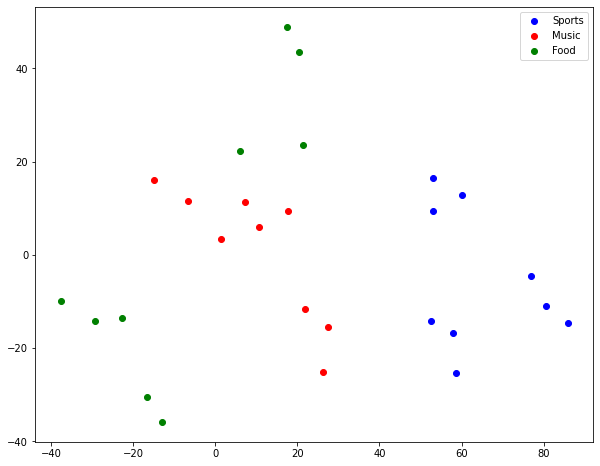

In [24]:
import matplotlib.pyplot as plt

# get a figure handle

#sports
sportsX = tsne_X[0:9,0]
sportsY = tsne_X[0:9,1]
#music
musicX = tsne_X[9:18,0]
musicY = tsne_X[9:18,1]
#food
foodX = tsne_X[18:27,0]
foodY = tsne_X[18:27,1]

fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(sportsX, sportsY, c = 'blue', label='Sports')
plt.scatter(musicX, musicY, c = 'red', label = 'Music')
plt.scatter(foodX, foodY, c = 'green', label = 'Food')
plt.legend()
plt.show()


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  It took some time to find the right parameterization. The trick in this case was a lower learning rate and a lower perplexity than are default. But, finally, tSNE was able to reliably cluster the three categories, though the clustering isn't very tight.


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jommc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jommc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jommc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [26]:
# Import the train.txt and val.txt file into pandas dataframe format 

# train 
train = pd.read_csv('train.txt', sep = ';', header = None)
# validation
val = pd.read_csv('val.txt', sep = ';', header = None)
# and printout the train.shape and validation.shape 
print(train.shape)
print(val.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)
#numpy, because I have an easier time with it than pandas
train = train.to_numpy()
x_train = train[:,0]
y_train = train[:,1]
val = val.to_numpy()
x_val = val[:,0]
y_val = val[:,1]

(16000, 2)
(2000, 2)


In [27]:
# clean the text in the train and validation dataframes using the clean_text function provided above
for i in range(len(train)):
    x_train[i] = clean_text(x_train[i])

for i in range(len(val)):
    x_val[i] = clean_text(x_val[i])

In [28]:
# initialise count vectorizer from sklearn module with default parameter
countVec = CountVectorizer()
# fit on train dataset and transform both train and validation dataset
countVec.fit(x_train,y_train)
countTrain = countVec.transform(x_train)
countVal = countVec.transform(x_val)

In [29]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfidfVec = TfidfVectorizer()
# fit on train dataset and transform both train and validation dataset
tfidfVec.fit(x_train,x_train)
tfidfTrain = tfidfVec.transform(x_train)
tfidfVal = tfidfVec.transform(x_val)

In [30]:
# initialise label encoder from sklearn module
le = preprocessing.LabelEncoder()
# fit on train labels and transform both train and validation labels
le.fit(y_train)
leTrain = le.transform(y_train)
leVal = le.transform(y_val)

In [31]:
# convert the labels into one hot encoding form | I CANNOT FIND ANYTHING THAT WILL EXPLAIN HOW THIS WORKS FOR ME
ohe = preprocessing.OneHotEncoder()
#ohe.fit(leTrain)
#oheTrain = ohe.transform(y_train)
#oheVal = ohe.transform(y_val)

In [32]:
unique_classes = []
for i in range(len(train)):
    if train[i,1] not in unique_classes:
        unique_classes.append(train[i,1])

num_classes = len(unique_classes)


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [42]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
    model = tf.keras.Sequential()
    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    model.add(inp)
    # layer 2 : add the dense layer with 2048 units and relu activation
    model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
    # layer 3 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(1024, activation = 'tanh', activity_regularizer=tf.keras.regularizers.L2(0.01)))
    # layer 5 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(512, activation = 'tanh', activity_regularizer=tf.keras.regularizers.L2(0.01)))
    # layer 7 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(256, activation = 'tanh', activity_regularizer=tf.keras.regularizers.L2(0.01)))
    # layer 9 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(128, activation = 'tanh', activity_regularizer=tf.keras.regularizers.L2(0.01)))
    # layer 11 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 12 : output layer with units equal to number of classes and activation as softmax
    model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
    # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
    model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = tf.keras.losses.CategoricalCrossentropy(), 
                 metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), 
                           tf.keras.metrics.Recall()])
    return model


In [34]:
# call the build_model function and initialize the model
countTrain.shape
model = build_model(countTrain)

In [36]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
y = tf.keras.utils.to_categorical(leTrain, num_classes) #necessary because I did not understand sklearn's one hot encoding
model.fit(countTrain, y, batch_size = 8, epochs = 10)

[4 4 0 ... 2 0 4]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
Epoch 1/10
2000/2000 [==============================] - 328s 164ms/step - loss: 0.8597 - auc: 0.9533 - accuracy: 0.0000e+00 - precision: 0.8389 - recall: 0.7121
Epoch 2/10
2000/2000 [==============================] - 324s 162ms/step - loss: 0.8821 - auc: 0.9505 - accuracy: 0.0000e+00 - precision: 0.8364 - recall: 0.7021
Epoch 3/10
2000/2000 [==============================] - 313s 156ms/step - loss: 0.8784 - auc: 0.9502 - accuracy: 0.0000e+00 - precision: 0.8382 - recall: 0.6990
Epoch 4/10
2000/2000 [==============================] - 313s 157ms/step - loss: 0.8850 - auc: 0.9498 - accuracy: 0.0000e+00 - precision: 0.8375 - recall: 0.6979
Epoch 5/10
2000/2000 [==============================] - 315s 157ms/step - loss: 0.8759 - auc: 0.9506 - accuracy: 0.0000e+00 - precision: 0.8394 - recall: 0.6966
Epoch 6/10
2000/2000 [=======================

In [54]:
y_test = tf.keras.utils.to_categorical(leTrain, num_classes)
model.evaluate(countVal, y_test, batch_size = 8)

ValueError: Dimensions 2000 and 16000 are not compatible

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

#MY TRAINING ACCURACY READS AS 0, DESPITE USING THE FUNCTION AS DEFINED IN THE DOCUMENTATION https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy


In [43]:
# again call the build_model function and initialize the model
model2 = build_model(tfidfTrain)

In [44]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
model2.fit(tfidfTrain.todense(), y, batch_size = 8, epochs = 10)

Epoch 1/10
2000/2000 [==============================] - 635s 317ms/step - loss: 1.1982 - auc_3: 0.8928 - accuracy: 0.0000e+00 - precision_2: 0.7626 - recall_2: 0.4785
Epoch 2/10
2000/2000 [==============================] - 623s 311ms/step - loss: 0.7684 - auc_3: 0.9665 - accuracy: 0.0000e+00 - precision_2: 0.8551 - recall_2: 0.7579
Epoch 3/10
2000/2000 [==============================] - 627s 313ms/step - loss: 0.7126 - auc_3: 0.9712 - accuracy: 0.0000e+00 - precision_2: 0.8600 - recall_2: 0.7826
Epoch 4/10
2000/2000 [==============================] - 632s 316ms/step - loss: 0.7223 - auc_3: 0.9702 - accuracy: 1.0417e-05 - precision_2: 0.8551 - recall_2: 0.7796
Epoch 5/10
2000/2000 [==============================] - 634s 317ms/step - loss: 0.7289 - auc_3: 0.9699 - accuracy: 2.0833e-05 - precision_2: 0.8545 - recall_2: 0.7775
Epoch 6/10
2000/2000 [==============================] - 635s 317ms/step - loss: 0.7451 - auc_3: 0.9680 - accuracy: 1.0417e-05 - precision_2: 0.8556 - recall_2: 0.778

In [53]:
model2.evaluate(tfidfVal, y_test, batch_size = 8)

InvalidArgumentError: indices[1] = [0,10992] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

#MY TRAINING ACCURACY READS AS 0, DESPITE USING THE FUNCTION AS DEFINED IN THE DOCUMENTATION https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy


## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** 
Count Vectorizer just counts the number of appearances of a word in a document.
TFIDF aims to highly rate the words that seem to have the most impact through scaling inverse document frequency by term frequency.
Word2Vec creates a much denser vector than the above two. It uses embeddings where similar words or words commonly sharing context have similar embedding vectors. This can increase generalizability.
GloVe is another kind of embedding model. Instead based on the co-occurance of words in the corpus. 

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**
The biggest difference is that the probabilities using the BoW approach will depend in magnitude on the absolute number of appearances of the word; whereas for the TF-IDF version, the biggest probabilities will belong to the words with the largest impact (as defined by TF-IDF). 